In [1]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
import cv2

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output', lang='eng'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang=lang,    
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.jpg")
            print(output_img_path)
            cropped_image = image.crop((
                    left,
                    top,
                    left+width,
                    top+height))
                
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [2]:
def recognize_images(cropped_image_path_list, lang='eng'):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang=lang,    
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

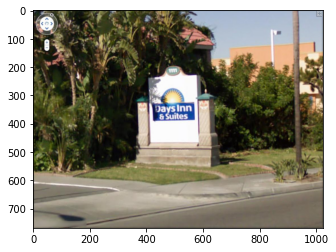

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [3]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/images/'
dir_list = os.listdir(work_dir)

for item in dir_list:
    if 'jpg' in item:
        img_file_path = work_dir + item 
        img = Image.open(img_file_path)
        plt.imshow(img)
        plt.show()

        # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
        if 'kor' in item:
            cropped_image_path_list = crop_word_regions(img_file_path, work_dir, lang='kor')
            recognize_images(cropped_image_path_list, lang='kor')
        else:
            cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
            recognize_images(cropped_image_path_list)
    else:
        continue

In [4]:
list = []
for item in dir_list:
    if 'jpg' in item:
        list.append(work_dir+item)
    else:
        break

In [5]:
print(dir_list)

['00_18.jpg', '00_07.jpg', 'kor_print.jpg', '00_06.jpg', '00_03.jpg', '00_10.jpg', '00_02.jpg', '00_04.jpg', '00_15.jpg', '00_00.jpg', 'kor_writing2.jpg', '00_17.jpg', '00_08.jpg', '00_19.jpg', 'kor_print2.jpg', '00_11.jpg', '00_16.jpg', '00_12.jpg', '.ipynb_checkpoints', '00_05.jpg', '0000.jpg', '00_09.jpg', 'kor_writing1.jpg', '00_14.jpg', '00_13.jpg', '00_01.jpg']


In [6]:
print(list)

['/aiffel/aiffel/ocr_python/images/00_18.jpg', '/aiffel/aiffel/ocr_python/images/00_07.jpg', '/aiffel/aiffel/ocr_python/images/kor_print.jpg', '/aiffel/aiffel/ocr_python/images/00_06.jpg', '/aiffel/aiffel/ocr_python/images/00_03.jpg', '/aiffel/aiffel/ocr_python/images/00_10.jpg', '/aiffel/aiffel/ocr_python/images/00_02.jpg', '/aiffel/aiffel/ocr_python/images/00_04.jpg', '/aiffel/aiffel/ocr_python/images/00_15.jpg', '/aiffel/aiffel/ocr_python/images/00_00.jpg', '/aiffel/aiffel/ocr_python/images/kor_writing2.jpg', '/aiffel/aiffel/ocr_python/images/00_17.jpg', '/aiffel/aiffel/ocr_python/images/00_08.jpg', '/aiffel/aiffel/ocr_python/images/00_19.jpg', '/aiffel/aiffel/ocr_python/images/kor_print2.jpg', '/aiffel/aiffel/ocr_python/images/00_11.jpg', '/aiffel/aiffel/ocr_python/images/00_16.jpg', '/aiffel/aiffel/ocr_python/images/00_12.jpg']


## keras-ocr

In [7]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


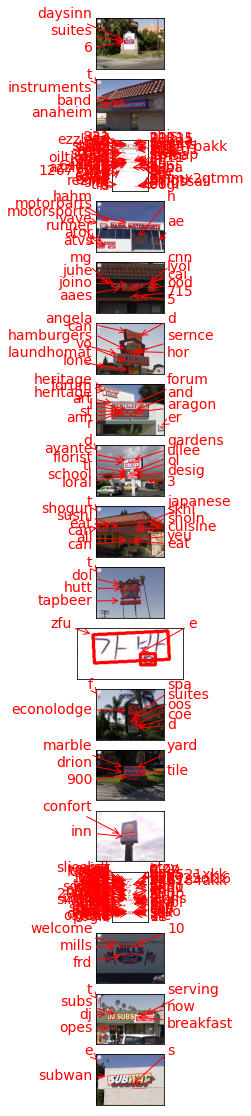

In [8]:
images = [ keras_ocr.tools.read(file_path) for file_path in list]
prediction_groups = [pipeline.recognize([file_path]) for file_path in list]

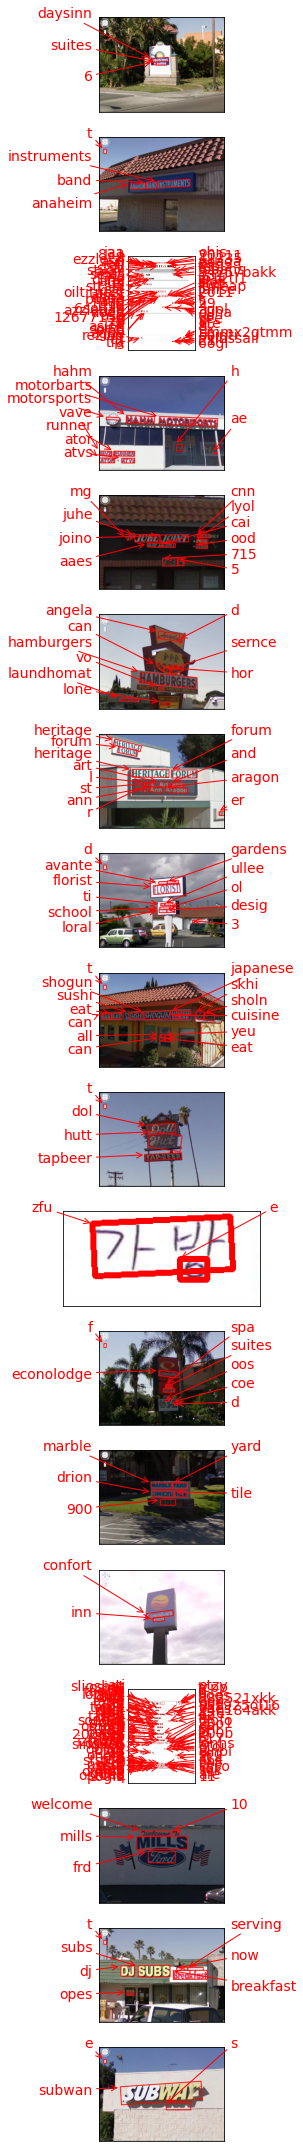

In [9]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(30, 30))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)
    plt.tight_layout()

In [5]:
# fiftyone zoo 모듈로 텍스트 모양, 크기, 배치, 노이즈가 있는 이미지 가져오기
!pip install fiftyone

     |████████████████████████████████| 1.1 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 75.3 MB/s eta 0:00:01
     |████████████████████████████████| 631 kB 75.8 MB/s eta 0:00:01
     |████████████████████████████████| 29.2 MB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 786 kB/s  eta 0:00:01
     |████████████████████████████████| 36.7 MB 72.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 73.1 MB/s eta 0:00:01
     |████████████████████████████████| 526 kB 54.8 MB/s eta 0:00:01
     |████████████████████████████████| 557 kB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 131 kB 74.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.9 MB 71.5 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 225 kB 71.9 MB/s eta 0:00:01
     |████████████████████████████████| 241 kB 69.4 MB/s eta 0:00:01
     |████████████████████████████

In [6]:
import fiftyone as fo
import fiftyone.zoo as foz

# Load COCO-2017
dataset = foz.load_zoo_dataset("coco-2017", split='validation')

# Give the dataset a new name, and make it persistent so that you can
# work with it in future sessions
dataset.name = "coco-2017-validation-example"
dataset.persistent = True

# Visualize the in the App
session = fo.launch_app(dataset)

 100% |██████|    1.9Gb/1.9Gb [3.1s elapsed, 0s remaining, 667.7Mb/s]       
Extracting annotations to '/aiffel/fiftyone/coco-2017/raw/instances_val2017.json'
 100% |██████|    6.1Gb/6.1Gb [11.0s elapsed, 0s remaining, 583.7Mb/s]      
Extracting images to '/aiffel/fiftyone/coco-2017/validation/data'
Writing annotations to '/aiffel/fiftyone/coco-2017/validation/labels.json'
Dataset info written to '/aiffel/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'validation'
 100% |███████████████| 5000/5000 [30.6s elapsed, 0s remaining, 173.1 samples/s]      
Dataset 'coco-2017-validation' created
